## NLP of Comedians

In [1]:
import requests
from bs4 import BeautifulSoup
import pickle

In [2]:
def url_to_transcript(url):
    page = requests.get(url).text
    soup = BeautifulSoup(page, 'lxml')
    text = [p.text for p in soup.find(class_ = "elementor-element elementor-element-74af9a5b elementor-widget elementor-widget-theme-post-content").find_all('p')]
    print(url)
    return text
urls = ['https://scrapsfromtheloft.com/2017/05/06/louis-ck-oh-my-god-full-transcript/',
        'https://scrapsfromtheloft.com/2017/04/11/dave-chappelle-age-spin-2017-full-transcript/',
        'https://scrapsfromtheloft.com/2018/03/15/ricky-gervais-humanity-transcript/',
        'https://scrapsfromtheloft.com/2017/05/24/bill-burr-im-sorry-feel-way-2014-full-transcript/',
        'https://scrapsfromtheloft.com/2017/04/21/jim-jefferies-bare-2014-full-transcript/',
        'https://scrapsfromtheloft.com/2017/09/19/ali-wong-baby-cobra-2016-full-transcript/',
        'https://scrapsfromtheloft.com/2017/08/03/anthony-jeselnik-thoughts-prayers-2015-full-transcript/',
        'https://scrapsfromtheloft.com/2017/03/03/mike-birbiglia-my-girlfriends-boyfriend-2013-full-transcript/',
        'https://scrapsfromtheloft.com/2017/08/19/joe-rogan-triggered-2016-full-transcript/']
comedians = ['louis','dave','ricky','bill','jim','ali','anthony','mike','joe']

In [3]:
trancripts=[url_to_transcript(u)for u in urls]

https://scrapsfromtheloft.com/2017/05/06/louis-ck-oh-my-god-full-transcript/
https://scrapsfromtheloft.com/2017/04/11/dave-chappelle-age-spin-2017-full-transcript/
https://scrapsfromtheloft.com/2018/03/15/ricky-gervais-humanity-transcript/
https://scrapsfromtheloft.com/2017/05/24/bill-burr-im-sorry-feel-way-2014-full-transcript/
https://scrapsfromtheloft.com/2017/04/21/jim-jefferies-bare-2014-full-transcript/
https://scrapsfromtheloft.com/2017/09/19/ali-wong-baby-cobra-2016-full-transcript/
https://scrapsfromtheloft.com/2017/08/03/anthony-jeselnik-thoughts-prayers-2015-full-transcript/
https://scrapsfromtheloft.com/2017/03/03/mike-birbiglia-my-girlfriends-boyfriend-2013-full-transcript/
https://scrapsfromtheloft.com/2017/08/19/joe-rogan-triggered-2016-full-transcript/


In [4]:
## Pickle files for later use -- sonradan kullanmak için pickle a yüklüyoruz

#!mkdir transcripts
#burda yukarda ki url deki transcriptleri , transcripts adlı dosya kurduk

for i,c in enumerate(comedians):
    with open("transcripts/"+c+".txt","wb") as file:
        pickle.dump(trancripts[i],file)
#dosyayı txt uzantısıyla kaydediyoruz

In [5]:
#load pickled files
data={}
for i,c in enumerate(comedians):
    with open("transcripts/"+c+".txt","rb") as file:
        data[c]=pickle.load(file)
# transcript ile hangi komedyenlerin transcripti olduğunu bulmak için
# data adlı kütüphane ile bunları birleştiriyoruz

In [6]:
data.keys()

dict_keys(['louis', 'dave', 'ricky', 'bill', 'jim', 'ali', 'anthony', 'mike', 'joe'])

In [9]:
data["louis"][:2]

['Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily agree with you, but I appreciate very much. Well, this is a nice place. This is easily the nicest place For many miles in every direction. That’s how you compliment a building And shit on a town with one sentence. It is odd around here, as I was driving here. There doesn’t seem to be any difference Between the sidewalk and the street for pedestrians here. People just kind of walk in the middle of the road. I love traveling And seeing all the different parts of the country. I live in New York. I live in a– There’s no value to your doing that at all.',
 '“The Old Lady And The Dog”\nI live– I live in New York. I always– Like, there’s this old lady in my neighborhood, And she’s always walking her dog. She’s always just– she’s very old. She just stands there just being old, And the dog just fights gravity every day, just– The two of them, it’s re

## Cleaning The Data

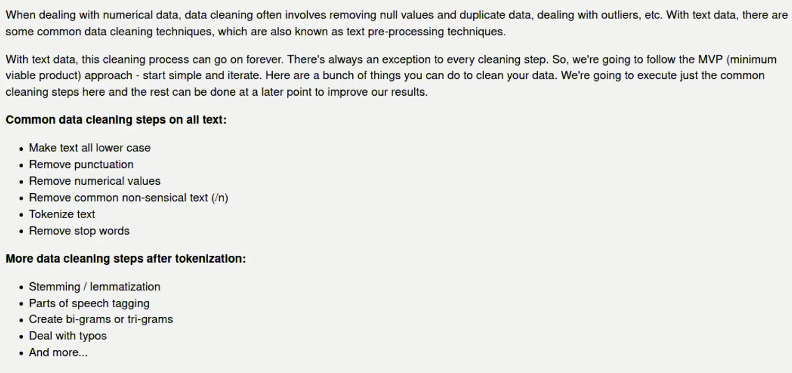

In [10]:
# We are going to change this to key: comedian, value: string format
def combine_text(list_of_text):
    """hepsini bir combine edilmiş texte dönüştürmek """
    combined_text=" ".join(list_of_text)
    return combined_text    
# fonksiyona gerek yok aslinda direkt de eklenebilir join()

In [15]:
# Combine it!
data_combined={key:[" ".join(value)] for (key,value) in data.items() }

In [16]:
data_combined

{'louis': ['Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily agree with you, but I appreciate very much. Well, this is a nice place. This is easily the nicest place For many miles in every direction. That’s how you compliment a building And shit on a town with one sentence. It is odd around here, as I was driving here. There doesn’t seem to be any difference Between the sidewalk and the street for pedestrians here. People just kind of walk in the middle of the road. I love traveling And seeing all the different parts of the country. I live in New York. I live in a– There’s no value to your doing that at all. “The Old Lady And The Dog”\nI live– I live in New York. I always– Like, there’s this old lady in my neighborhood, And she’s always walking her dog. She’s always just– she’s very old. She just stands there just being old, And the dog just fights gravity every day, just– The two of them, i

In [17]:
# We can either keep it in dictionary format or put it into a pandas dataframe
import pandas as pd 
pd.set_option("max_colwidth",150)

data_df=pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns=["transcript"]
data_df=data_df.sort_index()
data_df

,transcript
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ..."
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s..."
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ..."
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ..."
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello..."
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the f*ck is ..."
louis,Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...
mike,"Wow. Hey, thank you. Thanks. Thank you, guys. Hey, Seattle. Nice to see you. Look at this. Look at us. We’re here. This is crazy. It’s insane. So ..."
ricky,Hello. Hello! How you doing? Great. Thank you. Wow. Calm down. Shut the fuck up. Thank you. What a lovely welcome. I’m gonna try my hardest tonigh...


In [18]:
data_df.transcript.loc["ali"] # loc : locate

"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, like, ten minutes. But thank you, everybody, so much for coming. Um… It’s a very exciting day for me. It’s been a very exciting year for me. I turned 33 this year. Yes! Thank you, five people. I appreciate that. Uh, I can tell that I’m getting older, because, now, when I see an 18-year-old girl, my automatic thought… is “Fuck you.” “Fuck you. I don’t even know you, but fuck you!” ‘Cause I’m straight up jealous. I’m jealous, first and foremost, of their metabolism. Because 18-year-old girls, they could just eat like shit, and then they take a shit and have a six-pack, right? They got that-that beautiful inner thigh clearance where they put their feet together and there’s that huge gap here with the light of potential just radiating through.\nAnd then, when they go to sleep, they just go to 

In [19]:
# Apply a first round of text cleaning techniques
import re 
import string 
def clean_text_round1(text):
    text=text.lower()
    text=re.sub("\[.*?\]","",text)
    text=re.sub("[%s]"% re.escape(string.punctuation),"",text)
    text=re.sub("\w*\d\w*","",text)
    text=re.sub("[''""...]","",text)
    text=re.sub("\n","",text)
    return text
round1=lambda x: clean_text_round1(x)

In [20]:
data_clean=pd.DataFrame(data_df.transcript.apply(round1))
data_clean

,transcript
ali,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get thi...
anthony,thank you thank you thank you san francisco thank you so much so good to be here people were surprised when i told ’em i was gonna tape my special...
bill,all right thank you thank you very much thank you thank you thank you how are you what’s going on thank you it’s a pleasure to be here in the gre...
dave,this is dave he tells dirty jokes for a living that stare is where most of his hard work happens it signifies a profound train of thought the alch...
jim,ladies and gentlemen please welcome to the stage mr jim jefferies hello sit down sit down sit down sit down sit down thank you boston i appre...
joe,ladies and gentlemen welcome joe rogan what the fck is going on san francisco thanks for coming i appreciate it god damn put your phone down f...
louis,introfade the music out let’s roll hold there lights do the lights thank you thank you very much i appreciate that i don’t necessarily agree with ...
mike,wow hey thank you thanks thank you guys hey seattle nice to see you look at this look at us we’re here this is crazy it’s insane so about five yea...
ricky,hello hello how you doing great thank you wow calm down shut the fuck up thank you what a lovely welcome i’m gonna try my hardest tonight you’re t...


In [21]:
names= ['ali', 'anthony', 'bill', 'dave', 'jim', 'joe', 'louis', 'mike',
       'ricky']

data_df["names"]=names
data_df

,transcript,names
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ...",ali
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s...",anthony
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ...",bill
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ...",dave
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello...",jim
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the f*ck is ...",joe
louis,Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...,louis
mike,"Wow. Hey, thank you. Thanks. Thank you, guys. Hey, Seattle. Nice to see you. Look at this. Look at us. We’re here. This is crazy. It’s insane. So ...",mike
ricky,Hello. Hello! How you doing? Great. Thank you. Wow. Calm down. Shut the fuck up. Thank you. What a lovely welcome. I’m gonna try my hardest tonigh...,ricky


In [22]:
data_df.to_pickle("corpus.pkl")
# pickle dosyasına kaydediyoruz sonra kullanmak için (pickle turşusu)

## Document-Term Matrix
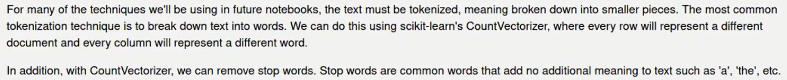

In [23]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(stop_words="english")
data_cv=cv.fit_transform(data_clean.transcript)
data_dtm=pd.DataFrame(data_cv.toarray(),columns=cv.get_feature_names_out())
data_dtm.index=data_clean.index
data_dtm

,aaaaah,aaah,aah,abc,abcs,ability,abject,able,ablebodied,abortion,...,yyou,ze,zealand,zeppelin,zero,zillion,zombie,zombies,zoning,zoo
ali,0,0,0,1,0,0,0,2,0,0,...,1,0,0,0,0,0,1,0,0,0
anthony,0,0,0,0,0,0,0,0,0,2,...,0,0,10,0,0,0,0,0,0,0
bill,1,0,0,0,1,0,0,1,0,0,...,0,1,0,0,1,1,1,1,1,0
dave,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,1,2,0,...,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
louis,0,0,3,0,0,0,0,1,0,0,...,0,0,0,0,2,0,0,0,0,0
mike,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,1,0,0,0,0,0
ricky,0,0,0,0,0,1,1,2,0,0,...,0,0,0,0,0,0,0,0,0,1


In [24]:
data_dtm.to_pickle("dtm.pkl") # for later use

In [25]:
# Let's also pickle the cleaned data
data_clean.to_pickle("data_clean.pkl")
pickle.dump(cv,open("cv.pkl","wb"))